In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


Load the Dataset

In [2]:
df = pd.read_csv('Bank_Marketing_Original_Data.csv')

In [3]:
print(df.columns)

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance', 'Housing',
       'Loan', 'contact', 'Day', 'Month', 'Duration', 'Campaign', 'Pdays',
       'Previous', 'poutcome', 'TARGET'],
      dtype='object')


In [4]:
print(df.shape)
print(df.head())
print(df.info())

(45211, 17)
   Age           Job  Marital  Education Default  Balance Housing Loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  Day Month  Duration  Campaign  Pdays  Previous poutcome TARGET  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data 

Explore Target class

Target Class Distribution:
 TARGET
no     0.883015
yes    0.116985
Name: proportion, dtype: float64


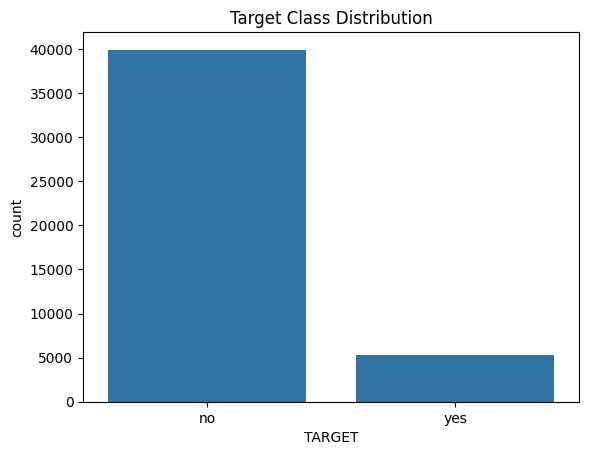

In [5]:
print("Target Class Distribution:\n", df['TARGET'].value_counts(normalize=True))

sns.countplot(x='TARGET', data=df)
plt.title("Target Class Distribution")
plt.show()


Explore Feature Relationships (EDA)

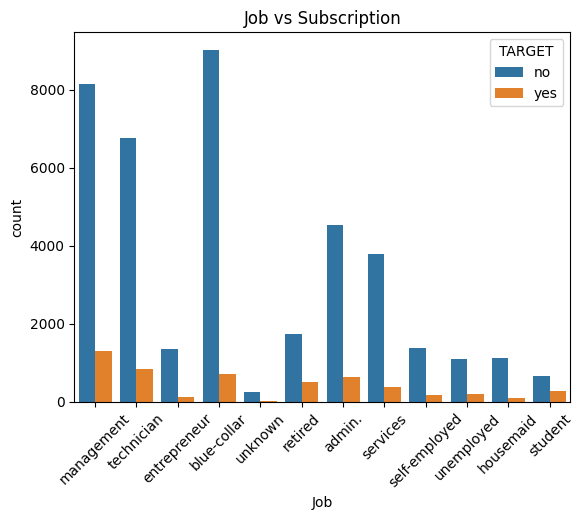

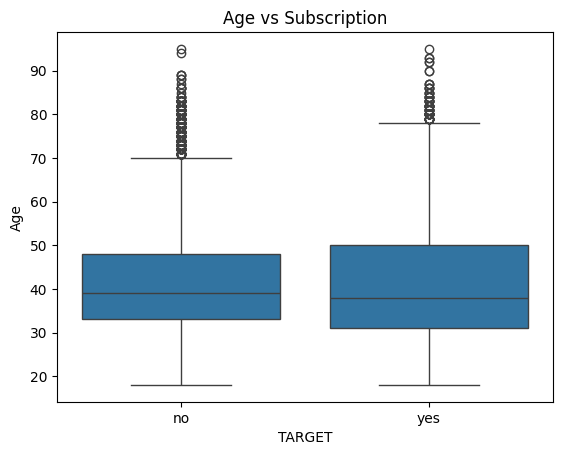

In [6]:
# Relationship: Job vs Target
sns.countplot(x='Job', hue='TARGET', data=df)
plt.title("Job vs Subscription")
plt.xticks(rotation=45)
plt.show()

# Relationship: Age vs Target
sns.boxplot(x='TARGET', y='Age', data=df)
plt.title("Age vs Subscription")
plt.show()


pre processing

In [7]:
# Fill unknowns
df.fillna('Unknown', inplace=True)

# Encode categorical variables
df_encoded = pd.get_dummies(df.drop('TARGET', axis=1), drop_first=True)

# Encode target
df_encoded['y'] = df['TARGET'].map({'no': 0, 'yes': 1})


Train-Test split

In [8]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Model

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))


Accuracy: 0.9039035718235099
F1 Score: 0.5014343086632244


In [10]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

model.fit(X_res, y_res)
y_pred_sm = model.predict(X_test)

print("SMOTE Accuracy:", accuracy_score(y_test, y_pred_sm))
print("SMOTE F1 Score:", f1_score(y_test, y_pred_sm))


SMOTE Accuracy: 0.8971580227800509
SMOTE F1 Score: 0.5472249269717624


Train Model Without SMOTE (Baseline)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred_baseline = model.predict(X_test)

baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
baseline_f1 = f1_score(y_test, y_pred_baseline)

print("Baseline Accuracy:", baseline_accuracy)
print("Baseline F1 Score:", baseline_f1)


Baseline Accuracy: 0.9039035718235099
Baseline F1 Score: 0.5014343086632244


Train Model With SMOTE

In [12]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

model.fit(X_resampled, y_resampled)

y_pred_smote = model.predict(X_test)

smote_accuracy = accuracy_score(y_test, y_pred_smote)
smote_f1 = f1_score(y_test, y_pred_smote)

print("SMOTE Accuracy:", smote_accuracy)
print("SMOTE F1 Score:", smote_f1)


SMOTE Accuracy: 0.8971580227800509
SMOTE F1 Score: 0.5472249269717624


Compare and Interpret

In [13]:
print("Performance Comparison:")
print("Baseline Accuracy:", round(baseline_accuracy, 4))
print("SMOTE Accuracy   :", round(smote_accuracy, 4))
print()
print("Baseline F1 Score:", round(baseline_f1, 4))
print("SMOTE F1 Score   :", round(smote_f1, 4))


Performance Comparison:
Baseline Accuracy: 0.9039
SMOTE Accuracy   : 0.8972

Baseline F1 Score: 0.5014
SMOTE F1 Score   : 0.5472


comparision : Confusion Matrix 

In [14]:
from sklearn.metrics import confusion_matrix

print("Baseline Confusion Matrix:\n", confusion_matrix(y_test, y_pred_baseline))
print("SMOTE Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))


Baseline Confusion Matrix:
 [[7737  215]
 [ 654  437]]
SMOTE Confusion Matrix:
 [[7551  401]
 [ 529  562]]
